<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/251117_%ED%8F%89%EA%B0%80_%EC%9C%A4%EC%A7%80%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 패션분야 럭키백
# 0~9 10개의 클래스
# 패션 MNIST

import tensorflow as tf
tf.keras.utils.set_random_seed(42)

tf.config.experimental.enable_op_determinism() # 오류용

from tensorflow import keras

# 훈련/테스트 데이터 로드
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
from sklearn.model_selection import train_test_split

#(60000, 28, 28) -> (48000, 28, 28, 1) 흑백이미지 1
train_scaled = train_input.reshape(-1,28,28,1)/255.0

train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size = 0.2,random_state = 42)

In [3]:
print(train_input.shape,train_target.shape) # 전처리 전 데이터
print(train_scaled.shape,train_target.shape) # 훈련데이터
print(val_scaled.shape,val_target.shape) # 검증데이터
print(test_input.shape,test_target.shape) # 테스트 데이터

(60000, 28, 28) (48000,)
(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)
(10000, 28, 28) (10000,)


In [4]:
# Sequential 객체 생성
model = keras.Sequential()
# 합성곱층 Conv2D 32, 커널(3,3) relu, same
model.add(keras.layers.Conv2D(
    32, kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)
))
# MaxPooling (28*28*32) -> (14*14*32)
model.add(keras.layers.MaxPooling2D(2))
# Conv2D 합성곱층 64 커널(3,3) relu, same
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
# MaxPooling (14*14*64) -> (7,7,64)
model.add(keras.layers.MaxPooling2D(2))
# Flatten
model.add(keras.layers.Flatten())
# 은닉층 100개의 뉴런, relu
model.add(keras.layers.Dense(100,activation='relu'))
# Dropout 은닉층 과대적합 방지
model.add(keras.layers.Dropout(0.4))
# 다중분류 softmax
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

# CNN 모델 구성 완료

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 모델 컴파일 adam 최적화
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
# ModelCheckpoint 콜백 조기종료
# 모델 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',save_best_only=True)

# ModelCheckPoint 콜백 조기종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

In [7]:
# 훈련 + EarlyStopping 콜백 조기종료
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7402 - loss: 0.7254 - val_accuracy: 0.8801 - val_loss: 0.3262
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.8681 - loss: 0.3659 - val_accuracy: 0.8973 - val_loss: 0.2803
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.8862 - loss: 0.3079 - val_accuracy: 0.8995 - val_loss: 0.2696
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.8976 - loss: 0.2764 - val_accuracy: 0.9115 - val_loss: 0.2381
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 40ms/step - accuracy: 0.9064 - loss: 0.2525 - val_accuracy: 0.9149 - val_loss: 0.2340
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.9150 - loss: 0.2264 - val_accuracy: 0.9143 - val_loss: 0.2281
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.9190 - loss: 0.2114 - val_accuracy: 0.9188 - val_loss: 0.2330
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.9277 -

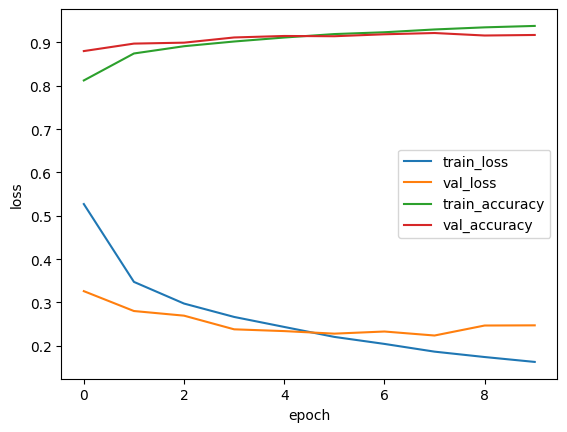

In [11]:
# 훈련 결과 그래프 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_accuracy'])
plt.show()

In [14]:
# 저장된 모델 불러오기
model = keras.models.load_model('best-cnn-model.keras')
# 검증세트 정확도 출력
model.evaluate(val_scaled,val_target) # 검증데이터

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9233 - loss: 0.2178


[0.2237873524427414, 0.921750009059906]

In [15]:
# 테스트 점수 확인
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target) # 테스트데이터

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9145 - loss: 0.2663


[0.248457133769989, 0.9150000214576721]